In [1]:
## Importing Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score
from sklearn.preprocessing import LabelEncoder
import nltk
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
## READING THE DATASET FROM DRIVE

In [8]:
df = pd.read_csv("/content/drive/MyDrive/PROJECTS/spam_classifier_ml/spam.csv",encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
## DATA CLEANING

In [11]:
# Dropping unwanted columns
df.drop(columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Renaming the columns v1 & v2 as target & text
df.rename(columns={"v1":"target","v2":"text"},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# checking for null values
df.isnull().sum()

,0
target,0
text,0


In [15]:
# checking for duplates
df.duplicated().sum()

403

In [16]:
# Dropping the duplicated values
df.drop_duplicates(keep="first",inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
##  EDA : Exploratory Data Analysis

In [20]:
## visulazing the percentage of classes of text

In [21]:
df['target'].value_counts()

,count
target,
ham,4516
spam,653


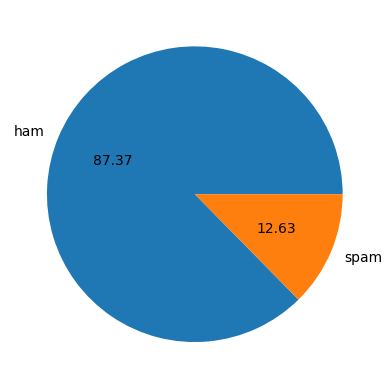

In [23]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct = "%0.2f")
plt.show()

In [29]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [26]:
df.columns

Index(['target', 'text'], dtype='object')

In [30]:
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_sentences,num_words,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",2,24,111
1,ham,Ok lar... Joking wif u oni...,2,8,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,2,37,155
3,ham,U dun say so early hor... U c already then say...,1,13,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,15,61


In [31]:
## Describing the numerical features

In [32]:
df[["num_sentences","num_words","num_characters"]].describe()

,num_sentences,num_words,num_characters
count,5169.000000,5169.000000,5169.000000
mean,1.965564,18.455794,78.977945
std,1.448541,13.324758,58.236293
min,1.000000,1.000000,2.000000
25%,1.000000,9.000000,36.000000
50%,1.000000,15.000000,60.000000
75%,2.000000,26.000000,117.000000
max,38.000000,220.000000,910.000000


In [36]:
# Describing spam emails
df[df['target']=="spam"][["num_sentences","num_words","num_characters"]].describe()

,num_sentences,num_words,num_characters
count,653.000000,653.000000,653.000000
mean,2.970904,27.667688,137.891271
std,1.488425,7.008418,30.137753
min,1.000000,2.000000,13.000000
25%,2.000000,25.000000,132.000000
50%,3.000000,29.000000,149.000000
75%,4.000000,32.000000,157.000000
max,9.000000,46.000000,224.000000


In [37]:
# Describing ham emails
df[df['target']!="spam"][["num_sentences","num_words","num_characters"]].describe()

,num_sentences,num_words,num_characters
count,4516.000000,4516.000000,4516.000000
mean,1.820195,17.123782,70.459256
std,1.383657,13.493970,56.358207
min,1.000000,1.000000,2.000000
25%,1.000000,8.000000,34.000000
50%,1.000000,13.000000,52.000000
75%,2.000000,22.000000,90.000000
max,38.000000,220.000000,910.000000


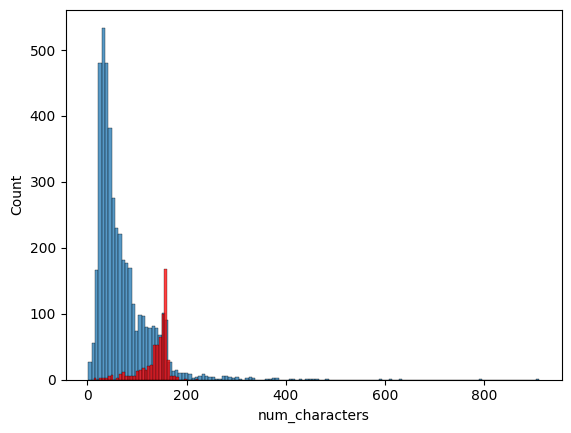

In [41]:
########spam messeges avg is larger than ham messeges
import seaborn as sns
sns.histplot(df[df['target']=='ham']['num_characters'])
sns.histplot(df[df['target']=='spam']['num_characters'],color='red')
plt.show()

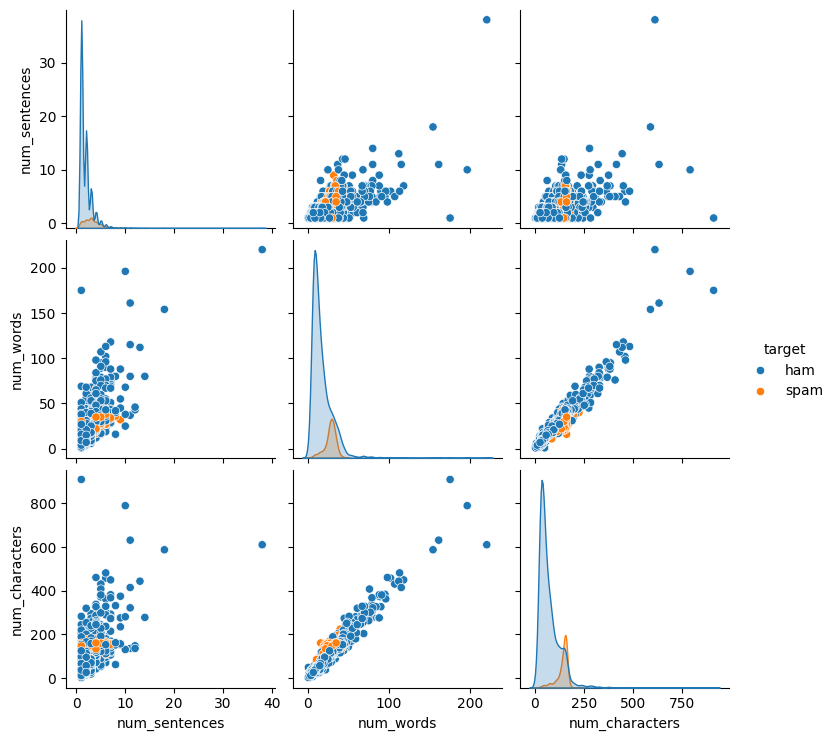

In [42]:
sns.pairplot(df,hue='target')

In [44]:
## Encoding the target
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text,num_sentences,num_words,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",2,24,111
1,0,Ok lar... Joking wif u oni...,2,8,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2,37,155
3,0,U dun say so early hor... U c already then say...,1,13,49
4,0,"Nah I don't think he goes to usf, he lives aro...",1,15,61


<Axes: >

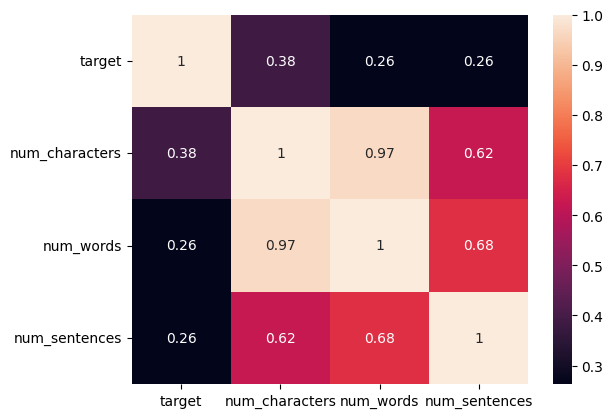

In [45]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

In [46]:
## DATA PREPROCESSING

In [48]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
import re
import string
def transform_text(text):
  text = text.lower()
  text = re.sub(r'\s+',' ',text)
  text = text.strip()
  text = nltk.word_tokenize(text)
  y = []
  ## FILTERING WORDS ONLY

  for word in text:
    if word.isalnum():
      y.append(word)
  text = y[:]
  y.clear()

  ## CLEARING STOPWORDS AND PUNCTUATIONS

  for word in text:
    if word not in stopwords.words('english') and word not in string.punctuation:
      y.append(word)
  text = y[:]
  y.clear()

  ## STEMMING
  for word in text :
    y.append(ps.stem(word))

  return " ".join(y).strip()


In [55]:
## Checking function transform_text
text = df['text'][0]
print("="*100)
print(":) Unprocessed Text :) \n")
print(text)
print("="*100)
print(":) Processed Text :) \n")
print(transform_text(text))

:) Unprocessed Text :) 

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
:) Processed Text :) 

go jurong point crazi avail bugi n great world la e buffet cine got amor wat


In [56]:
df['transform_text'] = df['text'].apply(transform_text)

In [57]:
df.head()

,target,text,num_sentences,num_words,num_characters,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",2,24,111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,2,8,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2,37,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,1,13,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",1,15,61,nah think goe usf live around though


In [58]:
## Printing the wordcloud

In [59]:
from wordcloud import WordCloud

In [68]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))

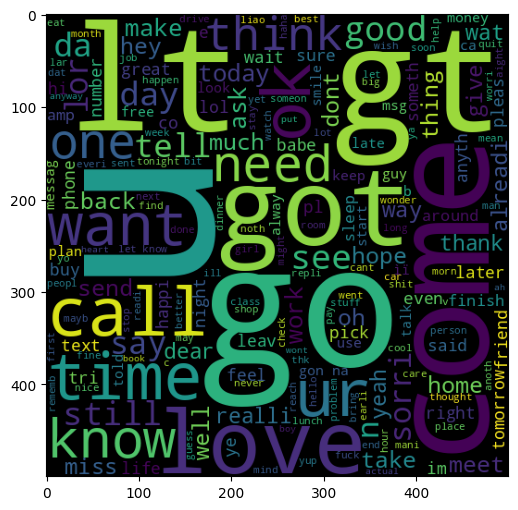

In [71]:
## plotting spam text word cloud
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

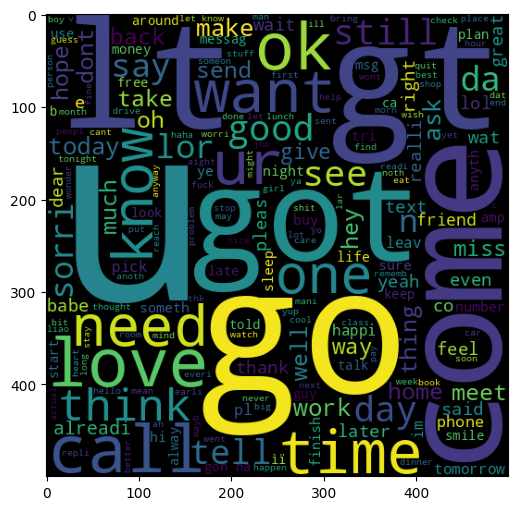

In [72]:
## plotting ham text word cloud
ham_wc = wc.generate(df[df['target']== 0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.show()

In [73]:
## MODEL BUILDING

In [75]:
## Tokenizing the text
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)

In [79]:
X = tfidf.fit_transform(df['transform_text']).toarray()
y = df['target'].values

In [80]:
X.shape

(5169, 3000)

In [81]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [83]:
# splitting the data into train test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [84]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [87]:
models = [GaussianNB(),MultinomialNB(),BernoulliNB(),SVC(),DecisionTreeClassifier()]
model_name = ["GaussianNB","MultinomialNB","BernoulliNB","SVC","DecisionTreeClassifier"]
for i,model in enumerate(models):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print("=================================================")
  print(f"MODEL NAME : {model_name[i]}")
  print(f"Accuracy : {accuracy_score(y_test,y_pred)}")
  print(f"Precision : {precision_score(y_test,y_pred)}")
  print(f"F1-Score : {f1_score(y_test,y_pred)}")

MODEL NAME : GaussianNB
Accuracy : 0.8597678916827853
Precision : 0.47844827586206895
F1-Score : 0.6049046321525886
MODEL NAME : MultinomialNB
Accuracy : 0.9613152804642167
Precision : 1.0
F1-Score : 0.8260869565217391
MODEL NAME : BernoulliNB
Accuracy : 0.9700193423597679
Precision : 0.9905660377358491
F1-Score : 0.8713692946058091
MODEL NAME : SVC
Accuracy : 0.965183752417795
Precision : 0.9714285714285714
F1-Score : 0.85
MODEL NAME : DecisionTreeClassifier
Accuracy : 0.9516441005802708
Precision : 0.8294573643410853
F1-Score : 0.8106060606060606


In [89]:
## DUMPING THE MODEL

multinomial = MultinomialNB()
multinomial.fit(X_train,y_train)

MultinomialNB()

In [90]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(multinomial,open('model.pkl','wb'))